##### What is statistics?
1. The field of statistic is the practice and study of collecting and analyze the daya.
2. A summary statistic a fact about or summary of data.

#### Types of statistics
1. Descriptive statistics
    Describe and summarize data
2. Infernetial statistics
    Use a sample of data to make inference about a larger population

#### Type of data
1. Numeric (quantitative)
    Conitunous (Measured)
    Discrete (Counted)
2. Categorical (qualitative)
    Nominal (Unordered)
    Ordinal(Ordered)




### Central trendency
1. Mean -> better for symmetric data
2. Median -> better for skewed data 

In [2]:
import numpy as np
import pandas as pd

In [3]:
food_consumption = pd.read_csv('Data/food_consumption.csv')
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
be_consumption = food_consumption[food_consumption['country']=='Belgium']
be_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
396,397,Belgium,pork,38.65,136.80
397,398,Belgium,poultry,12.20,13.11
398,399,Belgium,beef,15.63,482.31
399,400,Belgium,lamb_goat,1.32,46.23
400,401,Belgium,fish,18.97,30.29


In [6]:
usa_consumption = food_consumption[food_consumption['country']=='USA']
usa_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
55,56,USA,pork,27.64,97.83
56,57,USA,poultry,50.01,53.72
57,58,USA,beef,36.24,1118.29
58,59,USA,lamb_goat,0.43,15.06
59,60,USA,fish,12.35,19.72


In [7]:
np.mean(be_consumption['consumption'])

42.13272727272727

In [8]:
np.median(be_consumption['consumption'])

12.59

In [9]:
import matplotlib.pyplot as plt

In [10]:
rice_consumption = food_consumption[food_consumption['food_category']=='rice']
rice_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
8,9,Argentina,rice,8.77,11.22
19,20,Australia,rice,11.03,14.12
30,31,Albania,rice,7.78,9.96
41,42,Iceland,rice,3.89,4.98
52,53,New Zealand,rice,9.16,11.72


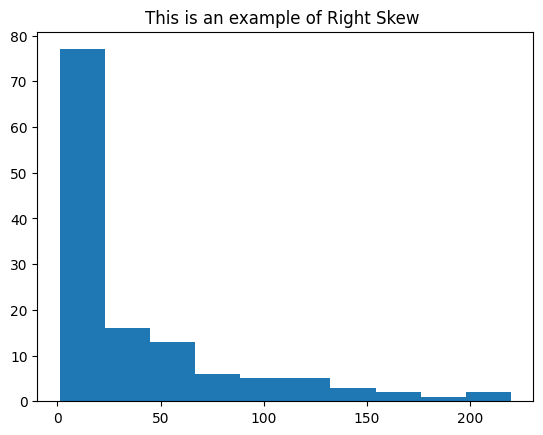

In [13]:
plt.hist(data=rice_consumption,x='co2_emission')
plt.title('This is an example of Right Skew ')
plt.show()

In [14]:
rice_consumption['co2_emission'].agg([np.mean,np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

## Measuer spread
1. It describe how spread apart or close togethor the data points are.

#### Variance
Average distance from each data point to the data's mean

#### standard deviation
root of variance.
squares distances, penalizing longer distances more tha shorte once.

#### mean abosulte devaiation
penalizes each distance equally.


### Quantiles
split te data into equal part.

#### Quartile
1st quartile  - 25
2nd quartile - 50
3rd quartile - 75


#### IQR
IQR = Q3 - Q1

#### Outliers 
Data points that is substantially different from the others.
1. data < Q1- 1.5 * IQR
2. data > Q3+ 1.5 * IQR

In [17]:
food_consumption['co2_emission'].quantile([0.25,0.5,0.75])

0.25     5.2100
0.50    16.5300
0.75    62.5975
Name: co2_emission, dtype: float64

In [18]:
np.quantile(food_consumption['co2_emission'],np.linspace(0,1,5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [19]:
food_consumption.groupby('food_category')['co2_emission'].agg([np.std,np.var])

,std,var
food_category,,
beef,297.906710,88748.408132
dairy,132.935669,17671.891985
eggs,4.622966,21.371819
fish,30.358481,921.637349
lamb_goat,128.356996,16475.518363
nuts,5.969895,35.639652
pork,55.632396,3094.963537
poultry,15.653332,245.026801
rice,47.763754,2281.376243


In [20]:
import matplotlib.pyplot as plt

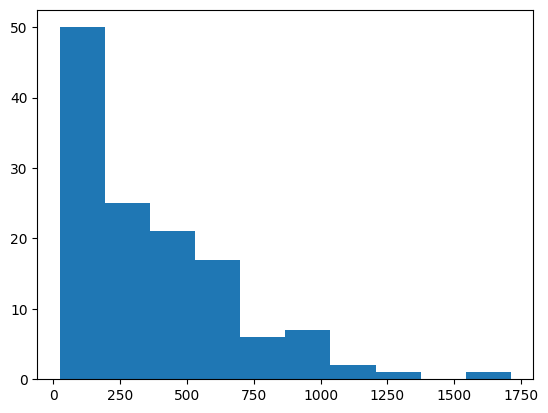

In [22]:
plt.hist(food_consumption[food_consumption['food_category']=='beef']['co2_emission'])
plt.show()

In [27]:
emission_by_country = food_consumption.groupby('country')['co2_emission'].sum()

In [29]:
q1 = emission_by_country.quantile(0.25)
q3 = emission_by_country.quantile(0.75)
iqr = q3 - q1
iqr

664.4925000000001

In [30]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [35]:
emission_by_country[(emission_by_country<lower) | (emission_by_country>upper)]

country
Argentina    2172.4
Name: co2_emission, dtype: float64